In [2]:
# libraries
from pandas import DataFrame,Series
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from collections import Counter
import os # to set wd # # os.environ['KERAS_BACKEND']='tensorflow' for keras
import re

# get time stamp
import time
# import Image
from IPython.display import Image

# BeautifulSoup 
from bs4 import BeautifulSoup
import  codecs # that’s to take care of things like accented characters, which are represented in different ways on

# lxml 
from lxml import html
import requests 

# Keras 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_auc_score
from keras import optimizers

# pwd

import os #
# Set wd
path = "/Users/heidinguyen/Downloads/"
os.chdir(path)
print (os.getcwd()); # Prints the working directory



Using TensorFlow backend.


/Users/heidinguyen/Downloads


Adding code to cycle through 1000 pages of product review as example.

In [3]:
pages = []
for i in range(1, 11870):
    url = 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber='+str(i)
    pages.append(url)

In [267]:
pages[0:10]

['https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=1',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=2',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=3',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=4',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=5',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=6',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=7',
 'https://www.amazon.com/product-reviews/B01DFKC2SO/ref=cm_cr_arp_d_paging_btm_2?ie=UTF8&showViewpoints=1&pageNumber=8',
 'https://www.amazon.com/product

Using an library  called Requests and lxml. We could also use beautiful soup for the same

In [268]:
from lxml import html  
import requests
import pandas as pd

In [269]:
##amazon_url = 'https://www.amazon.com/product-reviews/B01DFKC2SO?pageNumber=1&sortBy=recent'
##page = requests.get(amazon_url, headers = headers)
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.13; rv:61.0) Gecko/20100101 Firefox/61.0'

headers = {'User-Agent': user_agent}

#parser = html.fromstring(pages.content)

In [5]:
columns = ['rating','title', 'author','date','body','helpful']
reviews_df = pd.DataFrame(columns=columns)

This code basically cycles through the pages list and extracts the rating,title,author ,date and whether the review was helpful fields from the different 

In [6]:
for item in pages:
    page = requests.get(item, headers = headers)
    parser = html.fromstring(page.content)
    xpath_reviews = '//div[@data-hook="review"]'
    reviews = parser.xpath(xpath_reviews)
    xpath_rating  = './/i[@data-hook="review-star-rating"]//text()' 
    xpath_title   = './/a[@data-hook="review-title"]//text()'
    xpath_author  = './/a[@data-hook="review-author"]//text()'
    xpath_date    = './/span[@data-hook="review-date"]//text()'
    xpath_body    = './/span[@data-hook="review-body"]//text()'
    xpath_helpful = './/span[@data-hook="helpful-vote-statement"]//text()'
    for review in reviews:
        rating  = review.xpath(xpath_rating)
        title   = review.xpath(xpath_title)
        author  = review.xpath(xpath_author)
        date    = review.xpath(xpath_date)
        body    = review.xpath(xpath_body)
        helpful = review.xpath(xpath_helpful)

        review_dict = {'rating': rating,
                   'title': title,
                   'author': author,             
                   'date': date,
                   'body': body,
                   'helpful': helpful}
    
        reviews_df = reviews_df.append(review_dict, ignore_index=True)

Now that fields are extracted from multiple pages we would require some clean up of the fields

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18190 entries, 0 to 18189
Data columns (total 6 columns):
rating     18190 non-null object
title      18190 non-null object
author     18190 non-null object
date       18190 non-null object
body       18190 non-null object
helpful    18190 non-null object
dtypes: object(6)
memory usage: 852.7+ KB


In [ ]:
reviews_df.head(20)

In [ ]:
reviews_clean = reviews_df

In [ ]:
reviews_clean.head()
reviews_clean_test = reviews_clean[:1000]
reviews_clean_test.head()

In [35]:
 def strcln(df):
        for i in df.columns:
            df[i] = df[i].map(lambda x: str(x)[:-2]) # don't use this as it will turn utf-8 object into string
            df[i] = df[i].map(lambda x: str(x)[2:]) # don't use this as it will turn utf-8 object into string

In [ ]:
strcln(reviews_clean_test)

In [3]:
writer = pd.ExcelWriter('reviews_clean.xlsx')
reviews_clean.to_excel(writer,'reviews_clean')
writer.save()


NameError: name 'reviews_clean' is not defined

In [15]:
reviews_clean_test.head(15)

NameError: name 'reviews_clean_test' is not defined

# Data Cleanup 

In [5]:
import re
import pattern
# import pattern.en
import nltk
import string
from nltk.stem import WordNetLemmatizer

In [6]:

import pattern.en

#from pattern.en import suggest
import re, collections

def tokens(text): 
    """
    Get all words from the corpus
    """
    return re.findall('[a-z]+', text.lower()) 

WORDS = "finally"
WORD_COUNTS = collections.Counter(WORDS)

# top 10 words in corpus
print (WORD_COUNTS.most_common(10))


def known(words):
    """
    Return the subset of words that are actually 
    in our WORD_COUNTS dictionary.
    """
    return {w for w in words if w in WORD_COUNTS}


def edits0(word): 
    """
    Return all strings that are zero edits away 
    from the input word (i.e., the word itself).
    """
    return {word}



def edits1(word):
    """
    Return all strings that are one edit away 
    from the input word.
    """
    alphabet = 'abcdefghijklmnopqrstuvwxyz'
    def splits(word):
        """
        Return a list of all possible (first, rest) pairs 
        that the input word is made of.
        """
        return [(word[:i], word[i:]) 
                for i in range(len(word)+1)]
                
    pairs      = splits(word)
    deletes    = [a+b[1:]           for (a, b) in pairs if b]
    transposes = [a+b[1]+b[0]+b[2:] for (a, b) in pairs if len(b) > 1]
    replaces   = [a+c+b[1:]         for (a, b) in pairs for c in alphabet if b]
    inserts    = [a+c+b             for (a, b) in pairs for c in alphabet]
    return set(deletes + transposes + replaces + inserts)


def edits2(word):
    """Return all strings that are two edits away 
    from the input word.
    """
    return {e2 for e1 in edits1(word) for e2 in edits1(e1)}
    
    
def correct(word):
    """
    Get the best correct spelling for the input word
    """
    # Priority is for edit distance 0, then 1, then 2
    # else defaults to the input word itself.
    candidates = (known(edits0(word)) or 
                  known(edits1(word)) or 
                  known(edits2(word)) or 
                  [word])
    return max(candidates, key=WORD_COUNTS.get)


def correct_match(match):
    """
    Spell-correct word in match, 
    and preserve proper upper/lower/title case.
    """
    
    word = match.group()
    def case_of(text):
        """
        Return the case-function appropriate 
        for text: upper, lower, title, or just str.:
            """
        return (str.upper if text.isupper() else
                str.lower if text.islower() else
                str.title if text.istitle() else
                str)
    return case_of(word)(correct(word.lower()))

    
def correct_text_generic(text):
    """
    Correct all the words within a text, 
    returning the corrected text.
    """
    return re.sub('[a-zA-Z]+', correct_match, text)



print (correct_text_generic('Finale'))



#print (suggest('fianlly'))
#print (suggest('flaot'))
    
    


[('l', 2), ('a', 1), ('f', 1), ('i', 1), ('n', 1), ('y', 1)]
Finale


In [7]:
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list = stopword_list + ['mr', 'mrs', 'come', 'go', 'get',
                                 'tell', 'listen', 'one', 'two', 'three',
                                 'four', 'five', 'six', 'seven', 'eight',
                                 'nine', 'zero', 'join', 'find', 'make',
                                 'say', 'ask', 'tell', 'see', 'try', 'back',
'also']
wnl = WordNetLemmatizer()


In [8]:
from HTMLParser import HTMLParser
html_parser = HTMLParser()

In [9]:
# Tokenize texts
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

# Use the following items in the map
CONTRACTION_MAP = {
"ain\'t": "is not",
"aren\'t": "are not",
"can\'t": "cannot",
"can\'t\'ve": "cannot have",
"\'cause": "because",
"could\'ve": "could have",
"couldn\'t": "could not",
"couldn\'t\'ve": "could not have",
"didn\'t": "did not",
"doesn\'t": "does not",
"don\'t": "do not",
"hadn\'t": "had not",
"hadn\'t\'ve": "had not have",
"hasn\'t": "has not",
"haven\'t": "have not",
"he\'d": "he would",
"he\'d\'ve": "he would have",
"he\'ll": "he will",
"he\'ll\'ve": "he he will have",
"he\'s": "he is",
"how\'d": "how did",
"how\'d\'y": "how do you",
"how\'ll": "how will",
"how\'s": "how is",
"I\'d": "I would",
"I\'d\'ve": "I would have",
"I\'ll": "I will",
"I\'ll\'ve": "I will have",
"I\'m": "I am",
"I\'ve": "I have",
"i\'d": "i would",
"i\'d\'ve": "i would have",
"i\'ll": "i will",
"i\'ll\'ve": "i will have",
"i\'m": "i am",
"i\'ve": "i have",
"isn\'t": "is not",
"it\'d": "it would",
"it\'d\'ve": "it would have",
"it\'ll": "it will",
"it\'ll\'ve": "it will have",
"it\'s": "it is",
"let\'s": "let us",
"ma\'am": "madam",
"mayn\'t": "may not",
"might\'ve": "might have",
"mightn\'t": "might not",
"mightn\'t\'ve": "might not have",
"must\'ve": "must have",
"mustn\'t": "must not",
"mustn\'t\'ve": "must not have",
"needn\'t": "need not",
"needn\'t\'ve": "need not have",
"o\'clock": "of the clock",
"oughtn\'t": "ought not",
"oughtn\'t\'ve": "ought not have",
"shan\'t": "shall not",
"sha\'n\'t": "shall not",
"shan\'t\'ve": "shall not have",
"she\'d": "she would",
"she\'d\'ve": "she would have",
"she\'ll": "she will",
"she\'ll\'ve": "she will have",
"she\'s": "she is",
"should\'ve": "should have",
"shouldn\'t": "should not",
"shouldn\'t\'ve": "should not have",
"so\'ve": "so have",
"so\'s": "so as",
"that\'d": "that would",
"that\'d\'ve": "that would have",
"that\'s": "that is",
"there\'d": "there would",
"there\'d\'ve": "there would have",
"there\'s": "there is",
"they\'d": "they would",
"they\'d\'ve": "they would have",
"they\'ll": "they will",
"they\'ll\'ve": "they will have",
"they\'re": "they are",
"they\'ve": "they have",
"to\'ve": "to have",
"wasn\'t": "was not",
"we\'d": "we would",
"we\'d\'ve": "we would have",
"we\'ll": "we will",
"we\'ll\'ve": "we will have",
"we\'re": "we are",
"we\'ve": "we have",
"weren\'t": "were not",
"what\'ll": "what will",
"what\'ll\'ve": "what will have",
"what\'re": "what are",
"what\'s": "what is",
"what\'ve": "what have",
"when\'s": "when is",
"when\'ve": "when have",
"where\'d": "where did",
"where\'s": "where is",
"where\'ve": "where have",
"who\'ll": "who will",
"who\'ll\'ve": "who will have",
"who\'s": "who is",
"who\'ve": "who have",
"why\'s": "why is",
"why\'ve": "why have",
"will\'ve": "will have",
"won\'t": "will not",
"won\'t\'ve": "will not have",
"would\'ve": "would have",
"wouldn\'t": "would not",
"wouldn\'t\'ve": "would not have",
"y\'all": "you all",
"y\'all\'d": "you all would",
"y\'all\'d\'ve": "you all would have",
"y\'all\'re": "you all are",
"y\'all\'ve": "you all have",
"you\'d": "you would",
"you\'d\'ve": "you would have",
"you\'ll": "you will",
"you\'ll\'ve": "you will have",
"you\'re": "you are",
"you\'ve": "you have"
}
# Expand Contractions Function
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
    
    
from pattern.en import tag
from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None
    
    tagged_text = tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text
    
# lemmatize text based on POS tags    
def lemmatize_text(text):
    
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text
    

# Do not use this 
    def remove_special_characters(text):
    #tokens = tokenize_text(text)
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        filtered_tokens = filter(None, [pattern.sub('' , token) for token in tokens])
        filtered_text = ' '.join(filtered_tokens)
        return filtered_text
    
# remove Stop words     
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
# Remove Accented characters
def normalize_accented_characters(text):
    text = unicodedata.normalize('NFKD',text.decode('utf-8')).encode('ascii', 'ignore')
    return text
    
# # I am not using  this as I am applyting the functiona individually
# def normalize_corpus(corpus, tokenize=False):
    
#     normalized_corpus = []    
#     for text in corpus:
#         text = expand_contractions(text, CONTRACTION_MAP)
#         text = lemmatize_text(text)
#         text = remove_special_characters(text)
#         text = remove_stopwords(text)
#         normalized_corpus.append(text)
#         if tokenize:
#             text = tokenize_text(text)
#             normalized_corpus.append(text) 
            
#     return normalized_corpus

## HEIDI Added 

import re
def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def normalize_corpus(corpus, lemmatize=True, 
                     only_text_chars=False,
                     tokenize=False):
    
    normalized_corpus = []    
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html_parser.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
        text = remove_special_characters(text)
        text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
            
    return normalized_corpus


def strip_accents(text):
    """
    Strip accents from input String.

    :param text: The input string.
    :type text: String.

    :returns: The processed String.
    :rtype: String.
    """
    try:
        text = unicode(text, 'utf-8')
    except (TypeError, NameError): # unicode is a default on python 3 
        pass
    text = unicodedata.normalize('NFD', text)
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)


In [10]:
from contractions import CONTRACTION_MAP
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
from HTMLParser import HTMLParser
import unicodedata
def unescape_html(parser, text):

    return parser.unescape(text)
        
class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ' '.join(self.fed)
        
def strip_html(text):
    html_stripper = MLStripper()
    html_stripper.feed(text)
    return html_stripper.get_data()

## start reading in the data from here

In [12]:
# reviews_data = pd.read_excel('reviews_clean.xlsx')

## read in the data
reviews_data = pd.read_csv("reviews_rand500_nona20181027.csv")

# reviews_data_test = reviews_data[:100]
reviews_data.head()

rating                                              title author  \
0       1  Help! How do I fix this or do I have to send i...    NaN   
1       1                                      Step backward    NaN   
2       5                                         Five Stars    NaN   
3       1                       I did like the light feature    NaN   
4       5                                         Five Stars    NaN   

         date                                               body  \
0  2016-10-29  It came with polish and I speak English. Nowhe...   
1  2016-03-22  Back light works worse than in previous Paperw...   
2  2016-09-20  Easy to read, even in the dark. Lightweight. T...   
3  2017-01-02  Wanted to be able to press a button to turn th...   
4  2018-06-18                                       Best ereader   

                         helpful  \
0  One person found this helpful   
1  One person found this helpful   
2  One person found this helpful   
3  One person found this helpful   
4  One person found this helpful   

                                            page_url  length_reviews  
0  https://www.amazon.com/product-reviews/B00QJEL...              91  
1  https://www.amazon.com/product-reviews/B00QJEL...             112  
2  https://www.amazon.com/product-reviews/B00QJEL...             106  
3  https://www.amazon.com/product-reviews/B00QJEL...             117  
4  https://www.amazon.com/product-reviews/B00QJEL...              12

In [13]:
import unicodedata
text =[]
text = reviews_data['body']
normalize_accented = []
for corpus in text:
    t = normalize_accented_characters(corpus)
    normalize_accented.append(t)
    

In [14]:
normalize_accented[27]

"I'LL BE CHARGING ITEM AND WILL CHECK TO SEE HOW FAST BATTERY WILL LAST ON ITS CHARGE, THE CHARGE IS NOT LASTING ANY LONGER THAN MY OLD BATTERY"

In [15]:
text[27]

"I'LL BE CHARGING ITEM AND WILL CHECK TO SEE HOW FAST BATTERY WILL LAST ON ITS CHARGE, THE CHARGE IS NOT LASTING ANY LONGER THAN MY OLD BATTERY"

In [16]:
from HTMLParser import HTMLParser
html_parser = HTMLParser()

In [17]:
strip =[]
for corpus in normalize_accented:
    t = html_parser.unescape(corpus)
    m = strip_html(corpus)
    strip.append(m)

In [18]:
strip[27]

"I'LL BE CHARGING ITEM AND WILL CHECK TO SEE HOW FAST BATTERY WILL LAST ON ITS CHARGE, THE CHARGE IS NOT LASTING ANY LONGER THAN MY OLD BATTERY"

In [19]:
Expanded_Corpus =[]
for corpus in strip:
    t = expand_contractions(corpus,CONTRACTION_MAP)
    Expanded_Corpus.append(t)

In [20]:
Expanded_Corpus[27]

'I will BE CHARGING ITEM AND WILL CHECK TO SEE HOW FAST BATTERY WILL LAST ON ITS CHARGE, THE CHARGE IS NOT LASTING ANY LONGER THAN MY OLD BATTERY'

In [21]:
remove_special_characters = []
for text in Expanded_Corpus:
    t = re.sub('[^ a-zA-Z0-9]', '', text)
    remove_special_characters.append(t)


In [22]:
remove_stop_words =[]
for text in remove_special_characters:
    t  = remove_stopwords(text)
    remove_stop_words.append(t)

In [24]:
remove_stop_words[7]

'Very nice students'

In [25]:
len(remove_stop_words)

43620

In [26]:
%%time
Pos_Tagged =[]
tokens = []
for  text in remove_stop_words:
    tokens = pos_tag_text(text)
    Pos_Tagged.append(tokens)
    

CPU times: user 6min 27s, sys: 2.81 s, total: 6min 30s
Wall time: 9min 20s


In [27]:
Pos_Tagged[7]

[(u'very', u'r'), (u'nice', u'a'), (u'students', u'n')]

In [28]:
normalized_body = pd.Series(remove_stop_words)
POS_tagged_Normalized = pd.Series(Pos_Tagged)

In [29]:
reviews_data['Normalized Text'] = normalized_body.values
reviews_data['POS Tagged Normalized Text'] = POS_tagged_Normalized.values

In [30]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43620 entries, 0 to 43619
Data columns (total 10 columns):
rating                        43620 non-null int64
title                         43619 non-null object
author                        2441 non-null object
date                          43620 non-null object
body                          43620 non-null object
helpful                       26388 non-null object
page_url                      43620 non-null object
length_reviews                43620 non-null int64
Normalized Text               43620 non-null object
POS Tagged Normalized Text    43620 non-null object
dtypes: int64(2), object(8)
memory usage: 3.3+ MB


In [30]:
# reviews_data.to_csv("normlized_reviews_data.csv", header=True, index=False, encoding='utf-8')

## Sentiment Analysis 

In [31]:
def parse_document(document):
    document = re.sub('\n', ' ', document)
    if isinstance(document, str):
        document = document
    elif isinstance(document, unicode):
        return unicodedata.normalize('NFKD', document).encode('ascii', 'ignore')
    else:
        raise ValueError('Document is not string or unicode!')
    document = document.strip()
    sentences = nltk.sent_tokenize(document)
    sentences = [sentence.strip() for sentence in sentences]
    return sentences

In [32]:
# Feature Extraction
# utils.py

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def build_feature_matrix(documents, feature_type='frequency',
                         ngram_range=(1, 1), min_df=0.0, max_df=1.0):

    feature_type = feature_type.lower().strip()  
    
    if feature_type == 'binary':
        vectorizer = CountVectorizer(binary=True, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'frequency':
        vectorizer = CountVectorizer(binary=False, min_df=min_df,
                                     max_df=max_df, ngram_range=ngram_range)
    elif feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df, 
                                     ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")

    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix
   
    

In [33]:
 # # Model Performance Evaluation
from sklearn import metrics
import numpy as np
import pandas as pd

def display_evaluation_metrics(true_labels, predicted_labels, positive_class=1):
    
    print 'Accuracy:', np.round(
                        metrics.accuracy_score(true_labels, 
                                               predicted_labels),
                        2)
    print 'Precision:', np.round(
                        metrics.precision_score(true_labels, 
                                               predicted_labels,
                                               pos_label=positive_class,
                                               average='binary'),
                        2)
    print 'Recall:', np.round(
                        metrics.recall_score(true_labels, 
                                               predicted_labels,
                                               pos_label=positive_class,
                                               average='binary'),
                        2)
    print 'F1 Score:', np.round(
                        metrics.f1_score(true_labels, 
                                               predicted_labels,
                                               pos_label=positive_class,
                                               average='binary'),
                        2)
                        
def display_confusion_matrix(true_labels, predicted_labels, classes=[1,0]): # classes ['negative', 'neutral', 'positive']
    
    cm = metrics.confusion_matrix(y_true=true_labels, 
                                  y_pred=predicted_labels, 
                                  labels=classes)
    cm_frame = pd.DataFrame(data=cm, 
                            columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                  labels=[[0,0],[0,1]]), 
                            index=pd.MultiIndex(levels=[['Actual:'], classes], 
                                                labels=[[0,0],[0,1]])) 
    print cm_frame                            


def display_classification_report(true_labels, predicted_labels, classes=[1,0]):

    report = metrics.classification_report(y_true=true_labels, 
                                           y_pred=predicted_labels, 
                                           labels=classes) 
    print report

## Preparing Datasets

In [34]:
# Preparing Datasets
reviews_data = pd.read_csv(r'reviews_rand500_nona20181027.csv') # must read in as r'
reviews_data_test = reviews_data 

# reviews_data_test = reviews_data[:100]
# reviews_data.head()

reviews_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43620 entries, 0 to 43619
Data columns (total 8 columns):
rating            43620 non-null int64
title             43619 non-null object
author            2441 non-null object
date              43620 non-null object
body              43620 non-null object
helpful           26388 non-null object
page_url          43620 non-null object
length_reviews    43620 non-null int64
dtypes: int64(2), object(6)
memory usage: 2.7+ MB


In [36]:
reviews_data_test = reviews_data_test.drop_duplicates()
reviews_data_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43620 entries, 0 to 43619
Data columns (total 8 columns):
rating            43620 non-null int64
title             43619 non-null object
author            2441 non-null object
date              43620 non-null object
body              43620 non-null object
helpful           26388 non-null object
page_url          43620 non-null object
length_reviews    43620 non-null int64
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


In [37]:
from IPython.display import HTML
# cat_hist = reviews_data_test.groupby('category',as_index=False).count()
HTML(pd.DataFrame( reviews_data_test['body']).to_html())


In [122]:
dataset = pd.DataFrame(reviews_data_test[['body','rating']])
# dataset['sentiment'] = np.where(dataset['rating'] == 1, "negative","" )
# dataset['sentiment'] = np.where(dataset['rating'] == 2, "negative","" )
# dataset['sentiment'] = np.where(dataset['rating'] == 3, "negative","" )
# dataset['sentiment'] = np.where(dataset['rating'] == 4, "positive","" )
# dataset['sentiment'] = np.where(dataset['rating'] == 5, "positive","" )

# def label_sentiment (row):
#     if row['rating'] == 1 | row['rating'] == 2 | row['rating'] == 3:
#         return "negative"
#     return 'positive'

# dataset['sentiment'] = dataset.apply(label_sentiment, axis=1)


def label_sentiment (row):
    if row['rating'] == 1:
        return "negative"
    if row['rating'] == 2:
        return "negative"
    if row['rating'] == 3:
        return 'negative'
    if row['rating'] == 4: 
        return "positive"
    if row['rating'] == 5: 
        return "positive"    

dataset['sentiment'] = dataset.apply(label_sentiment, axis=1)

In [123]:
# check the data
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43620 entries, 0 to 43619
Data columns (total 3 columns):
body         43620 non-null object
rating       43620 non-null int64
sentiment    43620 non-null object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


body  rating sentiment
0  It came with polish and I speak English. Nowhe...       1  negative
1  Back light works worse than in previous Paperw...       1  negative
2  Easy to read, even in the dark. Lightweight. T...       5  positive
3  Wanted to be able to press a button to turn th...       1  negative
4                                       Best ereader       5  positive

In [124]:
# drop 'rating' column
dataset = dataset.drop(dataset.columns[1], axis=1)
dataset.rename(columns={'body': 'review'}, inplace=True)


## Read in the data for analysis

In [39]:
# save the feed data
# dataset.to_csv ("feed_reviews_data.csv", header=True, index=False, encoding='utf-8')

# read the data back in 
dataset = pd.read_csv("feed_reviews_data.csv")
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43620 entries, 0 to 43619
Data columns (total 2 columns):
review       43620 non-null object
sentiment    43620 non-null object
dtypes: object(2)
memory usage: 681.6+ KB


In [45]:
43620*0.2

8724.0

In [46]:
%%time
# prepare training and testing datasets
# load movie reviews data
# dataset = pd.read_csv(r'movie_reviews.csv')
# dataset = pd.read_csv(r'movie_reviews.csv')
# print sample data
# print dataset.head()

# from sklearn.model_selection import train_test_split
# sentences = df_source['review'].values # review 	sentiment
# y = df_source['sentiment'].values

# sentences_train, sentences_test, y_train, y_test = train_test_split(
#         sentences, y, test_size=0.25, random_state=1000)


# prepare training and testing datasets - split 80/20
# train_data = dataset[:3500]
# test_data = dataset[3500:]
train_data = dataset[:34896]
test_data = dataset[34896:] # 8724


train_reviews = np.array(train_data['review'])
train_sentiments = np.array(train_data['sentiment'])
test_reviews = np.array(test_data['review'])
test_sentiments = np.array(test_data['sentiment'])
# prepare sample dataset for experiments
sample_docs = [100, 130, 3, 2508, 3246] #[100, 5817, 7626, 7356, 1008, 7155, 3533, 13010]
sample_data = [(test_reviews[index],
                test_sentiments[index])
                  for index in sample_docs]



CPU times: user 7.32 ms, sys: 654 µs, total: 7.97 ms
Wall time: 8.69 ms


In [47]:
# look at the train data
train_reviews[:100]

array(['It came with polish and I speak English. Nowhere does it tell me how to fix this! Help!!!!!',
       'Back light works worse than in previous Paperwhite., Software is less intuitive., It is a big step backward., :(',
       'Easy to read, even in the dark. Lightweight. Type size adjustment and built in dictionary are a real plus.',
       'Wanted to be able to press a button to turn the page.  I did like the light feature.  I replaced it with the voyager.',
       'Best ereader', 'Absolutely love it!  Would give it as a gift.',
       'Love it, is very light and i can take it anyway',
       'Very nice for students',
       'I like it, takes a little getting used to with the touch screen, but other than that, all good.',
       'Two thumbs up',
       'Other worldly country music if such a thing exists! This man is a special talent and this album, his 2nd effort, reveals how significant he is (or should be) in the country music arena... hell, the music industry as a whole. Forg

In [128]:
# from afinn import Afinn
# afn = Afinn(emoticons=True) 
# print afn.score('I really hated the plot of this movie')
# print afn.score('I really hated the plot of this movie :(')


## Supervised Machine Learning Technique

In [129]:
# from normalization import normalize_corpus
# from utils import build_feature_matrix
# from normalization import keep_text_characters

# # normalization
# norm_train_reviews = normalize_corpus(train_reviews,lemmatize=True,only_text_chars=True)
# # feature extraction
# vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
#                                                   feature_type='tfidf',
#                                                   ngram_range=(1, 1),
#                                                   min_df=0.0, max_df=1.0)

In [48]:
import re
def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [49]:
def normalize_corpus(corpus, lemmatize=True, 
                     only_text_chars=False,
                     tokenize=False):
    
    normalized_corpus = []    
    for index, text in enumerate(corpus):
        text = normalize_accented_characters(text)
        text = html_parser.unescape(text)
        text = strip_html(text)
        text = expand_contractions(text, CONTRACTION_MAP)
        if lemmatize:
            text = lemmatize_text(text)
        else:
            text = text.lower()
            text = remove_special_characters(text)
            text = remove_stopwords(text)
        if only_text_chars:
            text = keep_text_characters(text)
        
        if tokenize:
            text = tokenize_text(text)
            normalized_corpus.append(text)
        else:
            normalized_corpus.append(text)
            
    return normalized_corpus

In [132]:
# %%time
# normalize the train reviews data 
# normalize_corpus(train_reviews,lemmatize=True,only_text_chars=True)

In [50]:
%%time 
# normalize the train reviews data 
norm_train_reviews = normalize_corpus(train_reviews,lemmatize=True,only_text_chars=True)


CPU times: user 12min 7s, sys: 5.61 s, total: 12min 13s
Wall time: 19min 24s


In [52]:
%%time 
# feature extraction - tfidf type
vectorizer, train_features = build_feature_matrix(documents=norm_train_reviews,
                                                  feature_type='tfidf',
                                                  ngram_range=(1, 1),
                                                  min_df=0.0, max_df=1.0)


CPU times: user 2.23 s, sys: 69.9 ms, total: 2.3 s
Wall time: 2.3 s


## Comparing training ability of a couples of algorithms 

In [53]:
## comparing training ability of a couples of algorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import cross_val_score


num_estimators = 150
# lets train some trees
clf_array = [
    ('Stump',              DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)),
    ('Tree',               DecisionTreeClassifier()),
    ('Random Trees',       RandomForestClassifier(max_depth=11, n_estimators=num_estimators)),
    ('Extra Random Trees', ExtraTreesClassifier(n_estimators=num_estimators,min_samples_split=2)),
    ('Boosted Tree',       GradientBoostingClassifier(n_estimators=num_estimators)), #takes a long time,
    ('SVM', SGDClassifier(loss='hinge', n_iter=200)),
    ('LogisticReg', LogisticRegression())
    ]

# Generalization score estimate from training data
for clf in clf_array:
    acc = cross_val_score(clf[1],train_features,train_sentiments)
    print (clf[0], acc.mean())

('Stump', 0.8274300795591384)
('Tree', 0.8370586238224638)
('Random Trees', 0.8274587336753022)
('Extra Random Trees', 0.85898092699468)
('Boosted Tree', 0.8745128153591392)


/Users/heidinguyen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/heidinguyen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/Users/heidinguyen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


('SVM', 0.8948590115798775)
('LogisticReg', 0.8927670714098124)


## We will now build our model using the support vector machine (SVM) algorithm which we used for text classification in Chapter 4. Refer to the “Support Vector Machines” subsection under the “Classification Algorithms” section in Chapter 4 to refresh your memory:



In [54]:
%%time 
from sklearn.linear_model import SGDClassifier
# build the model
svm = SGDClassifier(loss='hinge', n_iter=200)
svm.fit(train_features, train_sentiments)

/Users/heidinguyen/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


CPU times: user 2.36 s, sys: 31.5 ms, total: 2.39 s
Wall time: 2.24 s


**The preceding snippet trainings the classifier and builds the model that is in the
svm variable, which we can now use for predicting sentiment for new movie reviews (not used for training) from the test dataset. 

In [55]:
%%time
#Let us normalize and extract features from the test dataset first as mentioned in step 2 in our workflow:

# normalize reviews
norm_test_reviews = normalize_corpus(test_reviews, lemmatize=True, only_text_chars=True)
# extract features
test_features = vectorizer.transform(norm_test_reviews)


CPU times: user 1min 46s, sys: 929 ms, total: 1min 47s
Wall time: 1min 48s


# Now that we have our features for the entire test dataset, before we predict the sentiment and measure model prediction performance for the entire test dataset, let us look at some of the predictions for the sample documents we extracted earlier:

In [56]:
%%time 
# predict sentiment for sample docs from test data
for doc_index in sample_docs:
    print 'Review:-'
    print test_reviews[doc_index]
    print 'Actual Labeled Sentiment:', test_sentiments[doc_index] # test_sentiments
    doc_features = test_features[doc_index]
    predicted_sentiment = svm.predict(doc_features)[0]
    print 'Predicted Sentiment:', predicted_sentiment
    print 

Review:-
Ok.  Not as easy to use as original Kindle.
Actual Labeled Sentiment: positive
Predicted Sentiment: positive

Review:-
One of the best albums ever recorded.
Actual Labeled Sentiment: positive
Predicted Sentiment: positive

Review:-
Although I do not own a GB SP, I have good reason not to. I borrowed this device from my friend and enjoyed the forever lasting power supply and built-in lights, which I think is massive improvement of the last built-in light Gameboy Nintendo made., A brief history for those who don't know, before Gameboy Color came out, Nintendo made a built-in light version of Gameboy Pocket, expecting it to be a big hit, but they missed one big item of concern, a power supply. As the portable rechargeable power supply was still in question at this time, the gameboy's light (from my experience) required about 8 AA batteries for two hours of play, quite a drag when you are playing a non-savable game. After a big flop in the Japanese market, the product never made i

**You can look at each review, its actual labeled sentiment, and our predicted sentiment in the preceding output and see that we have some negative and positive reviews, and our model is able to correctly identify the sentiment for most of the sampled reviews except the last two reviews. If you look closely at the last two reviews, some part of the review has anegativesentiment("worst horror film","voted this movie to be bad")butthe general sentiment or opinion of the person who wrote the review was intended positive. These are the examples I mentioned earlier about the overlap of positive and negative emotions, which makes it difficult for the model to predict the actual sentiment!** 

## Let us now predict the sentiment for all our test dataset reviews and evaluate our model performance:

In [57]:
%%time 
# predict the sentiment for reviews
predicted_sentiments_svm = svm.predict(test_features)# added _svm
# evaluate model prediction performance
from utils import display_evaluation_metrics, display_confusion_matrix,display_classification_report
# show performance metrics
display_evaluation_metrics(true_labels=test_sentiments,
                        predicted_labels=predicted_sentiments_svm,
                        positive_class='positive')

Accuracy: 0.89
Precision: 0.89
Recall: 0.98
F1 Score: 0.93
CPU times: user 129 ms, sys: 6.37 ms, total: 136 ms
Wall time: 135 ms


In [58]:
# show confusion matrix for SVM
display_confusion_matrix(true_labels=test_sentiments,
                predicted_labels=predicted_sentiments_svm,
                classes=['positive', 'negative'])

                 Predicted:         
                   positive negative
Actual: positive       6942      136
        negative        837      809


In [59]:
# show detailed per-class classification report
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=predicted_sentiments_svm,
                              classes=['positive', 'negative'])

             precision    recall  f1-score   support

   positive       0.89      0.98      0.93      7078
   negative       0.86      0.49      0.62      1646

avg / total       0.89      0.89      0.88      8724



**Do try out building more models with different features (Chapter
4 talks about different feature-extraction techniques) and different supervised learning algorithms. Can you get a better model which predicts sentiment more accurately?


## Classification Model using the LogisticRegression algorithm:



In [60]:
%%time 
# from sklearn.linear_model import SGDClassifier
# # build the model
# svm = SGDClassifier(loss='hinge', n_iter=200)
# svm.fit(train_features, train_sentiments)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_features, train_sentiments)

# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)
# score = classifier.score(X_test, y_test)
# print('Accuracy: ', score)


CPU times: user 782 ms, sys: 21.8 ms, total: 804 ms
Wall time: 448 ms


In [61]:
# predict the sentiment for reviews
predicted_sentiments_lr = lr.predict(test_features)
# evaluate model prediction performance
from utils import display_evaluation_metrics, display_confusion_matrix,display_classification_report
# show performance metrics
display_evaluation_metrics(true_labels=test_sentiments,
                        predicted_labels=predicted_sentiments_lr,
                        positive_class='positive')

Accuracy: 0.89
Precision: 0.9
Recall: 0.97
F1 Score: 0.94


In [62]:
# show confusion matrix for SVM
display_confusion_matrix(true_labels=test_sentiments,
                predicted_labels=predicted_sentiments_lr,
                classes=['positive', 'negative'])

                 Predicted:         
                   positive negative
Actual: positive       6892      186
        negative        765      881


In [63]:
# show detailed per-class classification report
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=predicted_sentiments_lr,
                              classes=['positive', 'negative'])

             precision    recall  f1-score   support

   positive       0.90      0.97      0.94      7078
   negative       0.83      0.54      0.65      1646

avg / total       0.89      0.89      0.88      8724



## Classification Model using with GradientBoostingClassifier

In [64]:
%%time
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# build the model
# svm = SGDClassifier(loss='hinge', n_iter=200)
# svm.fit(train_features, train_sentiments)
xgb = GradientBoostingClassifier(n_estimators=150, learning_rate= 0.1, max_depth= 7)
xgb.fit(train_features, train_sentiments)


CPU times: user 2min 16s, sys: 495 ms, total: 2min 17s
Wall time: 2min 17s


In [65]:
%%time 
# predict the sentiment for test dataset movie reviews
predicted_sentiments_xgb = xgb.predict(test_features)# added _svm
# evaluate model prediction performance
from utils import display_evaluation_metrics, display_confusion_matrix,display_classification_report
# show performance metrics
display_evaluation_metrics(true_labels=test_sentiments,
                        predicted_labels=predicted_sentiments_xgb,
                        positive_class='positive')


Accuracy: 0.88
Precision: 0.89
Recall: 0.97
F1 Score: 0.93
CPU times: user 212 ms, sys: 3.9 ms, total: 216 ms
Wall time: 215 ms


In [66]:
# show confusion matrix for xgb
display_confusion_matrix(true_labels=test_sentiments,
                predicted_labels=predicted_sentiments_xgb,
                classes=['positive', 'negative'])

                 Predicted:         
                   positive negative
Actual: positive       6887      191
        negative        863      783


In [67]:
# show detailed per-class classification report for xgb
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=predicted_sentiments_xgb,
                              classes=['positive', 'negative'])

             precision    recall  f1-score   support

   positive       0.89      0.97      0.93      7078
   negative       0.80      0.48      0.60      1646

avg / total       0.87      0.88      0.87      8724



## Unsupervised Lexicon-based Techniques


In [141]:
# Afinn
# from afinn import Afinn # pip install afinn
# afn = Afinn(emoticons=True)
# print afn.score('I really hated the plot of this movie')

# print afn.score('I really hated the plot of this movie :(')


In [142]:
# SentiWordNet
# import nltk
# from nltk.corpus import sentiwordnet as swn
# # get synset for 'good'
# good = swn.senti_synsets('Awesome')[0]
# # print synset sentiment scores
# print 'Positive Polarity Score:', good.pos_score()
# print 'Negative Polarity Score:', good.neg_score()
# print 'Objective Score:', good.obj_score()


## we define a function that can take in a body of text (movie review in our case) and analyze its sentiment by leveraging sentiwordnet:

**We take in a body of text (a movie review), do some initial pre-processing, and then tokenize and POS tag the tokens. For each pair of (word, tag) we check if any senti-synsets exist for the same word and its corresponding tag. If there is a match, we take the first senti-synset and store its sentiment scores in corresponding variables, and finally we aggregate its scores. 

In [68]:
# from normalization import normalize_accented_characters, html_parser, strip_html

# from normalization import normalize_accented_characters, html_parser, strip_html

# SentiWordNet
import nltk
from nltk.corpus import sentiwordnet as swn

def analyze_sentiment_sentiwordnet_lexicon(review,
                                           verbose=False):
    # pre-process text
    review = normalize_accented_characters(review)
    review = html_parser.unescape(review)
    review = strip_html(review)
    # tokenize and POS tag text tokens
    text_tokens = nltk.word_tokenize(review)
    tagged_text = nltk.pos_tag(text_tokens)
    pos_score = neg_score = token_count = obj_score = 0
    global final_sentiment
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word, tag in tagged_text:
        ss_set = None
        if 'NN' in tag and swn.senti_synsets(word, 'n'):
            ss_set = swn.senti_synsets(word, 'n')[0]
        elif 'VB' in tag and swn.senti_synsets(word, 'v'):
            ss_set = swn.senti_synsets(word, 'v')[0]
        elif 'JJ' in tag and swn.senti_synsets(word, 'a'):
            ss_set = swn.senti_synsets(word, 'a')[0]
        elif 'RB' in tag and swn.senti_synsets(word, 'r'):
            ss_set = swn.senti_synsets(word, 'r')[0]
        elif 'NNP' in tag and swn.senti_synsets(word, 'a'): # Heidi added for the case of only 1 word in text and first letter is Capitalized
            ss_set = swn.senti_synsets(word, 'a')[0]
            
        # if senti-synset is found        
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
#             token_count += 1
            token_count = token_count + 1.0
            
        
#     print ss_set==True
    if token_count: # Heidi added in to avoid dividing 0 

        # aggregate final scores
        final_score = pos_score - neg_score
        norm_final_score = round(float(final_score) / token_count, 2)
        final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'

    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score,
                                         norm_pos_score, norm_neg_score,
                                         norm_final_score]],
                                         columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Objectivity',
                                                                       'Positive', 'Negative', 'Overall']], 
                                                              labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print sentiment_frame

    return final_sentiment
            
            

**We can now see the preceding function in action for our sample reviews (in the sample_data variable we created earlier from the test data) in the following snippet:

You can see detailed statistics related to each sentiment score and also the overall sentiment and compare it with the actual labeled sentiment for each review in the preceding output. Interestingly, we were able to predict the sentiment correctly for all our sampled reviews as compared to the supervised learning technique. But how well does this technique perform for our complete test movie reviews dataset? The following snippet will give us the answer!

In [69]:
%%time
for review, review_sentiment in sample_data:  
    print 'Review:'
    print review
    print
    print 'Labeled Sentiment:', review_sentiment    
    print    
    final_sentiment_sentiwordnet = analyze_sentiment_sentiwordnet_lexicon(review, # adding _sentiwordnet
                                                             verbose=True)
    print '-'*60     

Review:
Ok.  Not as easy to use as original Kindle.

Labeled Sentiment: positive

     SENTIMENT STATS:                                      
  Predicted Sentiment Objectivity Positive Negative Overall
0            negative        0.63     0.16     0.22   -0.06
------------------------------------------------------------
Review:
One of the best albums ever recorded.

Labeled Sentiment: positive

     SENTIMENT STATS:                                      
  Predicted Sentiment Objectivity Positive Negative Overall
0            positive        0.81     0.19      0.0    0.19
------------------------------------------------------------
Review:
Although I do not own a GB SP, I have good reason not to. I borrowed this device from my friend and enjoyed the forever lasting power supply and built-in lights, which I think is massive improvement of the last built-in light Gameboy Nintendo made., A brief history for those who don't know, before Gameboy Color came out, Nintendo made a built-in ligh

In [70]:
%%time 
# perform the classification

sentiwordnet_predictions = [analyze_sentiment_sentiwordnet_lexicon(review) for review in test_reviews]

# from utils import display_evaluation_metrics, display_confusion_matrix, display_classification_report

print 'Performance metrics:'
display_evaluation_metrics(true_labels=test_sentiments,
                           predicted_labels=sentiwordnet_predictions,
                           positive_class='positive')  
print '\nConfusion Matrix:'                           
display_confusion_matrix(true_labels=test_sentiments,
                         predicted_labels=sentiwordnet_predictions,
                         classes=['positive', 'negative'])
print '\nClassification report:'                         
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=sentiwordnet_predictions,
                              classes=['positive', 'negative'])  

                                                

Performance metrics:
Accuracy: 0.8
Precision: 0.86
Recall: 0.9
F1 Score: 0.88

Confusion Matrix:
                 Predicted:         
                   positive negative
Actual: positive       6367      711
        negative       1043      603

Classification report:
             precision    recall  f1-score   support

   positive       0.86      0.90      0.88      7078
   negative       0.46      0.37      0.41      1646

avg / total       0.78      0.80      0.79      8724

CPU times: user 1min 35s, sys: 1.11 s, total: 1min 36s
Wall time: 1min 36s


## VADER Lexicon

In [71]:
%%time 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment_vader_lexicon(review, 
                                    threshold=0.1,
                                    verbose=False):
    # pre-process text
    review = normalize_accented_characters(review)
    review = html_parser.unescape(review)
    review = strip_html(review)
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    final_sentiment = 'positive' if agg_score >= threshold\
                                   else 'negative'
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative',
                                                                       'Neutral']], 
                                                              labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print sentiment_frame
    
    return final_sentiment

CPU times: user 5.75 ms, sys: 8.71 ms, total: 14.5 ms
Wall time: 24.8 ms


/Users/heidinguyen/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


That function helps in computing the sentiment and various statistics associated with it for any text document (movie reviews in our case). The comments explain the main sections of the function, which include text-preprocessing, getting the necessary sentiment scores using the VADER lexicon, aggregating them, and computing the final sentiment (positive/negative) using a specific threshold we talked about earlier. A threshold of 0.1 seemed to work best on an average, but you can experiment further with it. 

In [72]:
# The following snippet shows us how to use this function on our sampled test movie reviews:
for review, review_sentiment in sample_data:
    print 'Review:'
    print review
    print
    print 'Labeled Sentiment:', review_sentiment    
    print    
    final_sentiment_vader = analyze_sentiment_vader_lexicon(review,
                                                        threshold=0.1,
                                                        verbose=True)
    print '-'*60                                                       


Review:
Ok.  Not as easy to use as original Kindle.

Labeled Sentiment: positive

     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive           0.27    35.0%    19.0%   47.0%
------------------------------------------------------------
Review:
One of the best albums ever recorded.

Labeled Sentiment: positive

     SENTIMENT STATS:                                         
  Predicted Sentiment Polarity Score Positive Negative Neutral
0            positive           0.64    41.0%     0.0%   59.0%
------------------------------------------------------------
Review:
Although I do not own a GB SP, I have good reason not to. I borrowed this device from my friend and enjoyed the forever lasting power supply and built-in lights, which I think is massive improvement of the last built-in light Gameboy Nintendo made., A brief history for those who don't know, before Gameboy Color came out, Nintendo ma

In [74]:
%%time
vader_predictions = [analyze_sentiment_vader_lexicon(review, threshold=0.1)
                     for review in test_reviews] 

print 'Performance metrics:'
display_evaluation_metrics(true_labels=test_sentiments,
                           predicted_labels=vader_predictions,
                           positive_class='positive')  
print '\nConfusion Matrix:'                           
display_confusion_matrix(true_labels=test_sentiments,
                         predicted_labels=vader_predictions,
                         classes=['positive', 'negative'])
print '\nClassification report:'                         
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=vader_predictions,
                              classes=['positive', 'negative']) 


Performance metrics:
Accuracy: 0.82
Precision: 0.9
Recall: 0.88
F1 Score: 0.89

Confusion Matrix:
                 Predicted:         
                   positive negative
Actual: positive       6237      841
        negative        716      930

Classification report:
             precision    recall  f1-score   support

   positive       0.90      0.88      0.89      7078
   negative       0.53      0.57      0.54      1646

avg / total       0.83      0.82      0.82      8724

CPU times: user 2min 25s, sys: 1.67 s, total: 2min 27s
Wall time: 2min 28s


**The preceding metrics depict that our model has a sentiment prediction accuracy of around 70 percent and an F1-score close to 75 percent, which is definitely better than our previous model. Also notice that we are able to correctly predict positive sentiment for xxx out of xxx positive movie reviews, and negative sentiment correctly for xxx out of xxx negative movie reviews.


## Pattern Lexicon

In [77]:
from pattern.en import sentiment, mood, modality
from pattern.en import parse, Sentence

def analyze_sentiment_pattern_lexicon(review, threshold=0.1,verbose=False):
    # pre-process text
    review = normalize_accented_characters(review)
    review = html_parser.unescape(review)
    review = strip_html(review)
    
    # Heidi: addding this to process review 
    review = parse(review, lemmata=True)
    review = Sentence(review)
    
    # analyze sentiment for the text document
    analysis = sentiment(review)
    sentiment_score = round(analysis[0], 2)
    sentiment_subjectivity = round(analysis[1], 2)
    # get final sentiment
    final_sentiment = 'positive' if sentiment_score >= threshold else 'negative'
    
#     if verbose:
#         # display detailed sentiment statistics
#         sentiment_frame = pd.DataFrame([[final_sentiment, sentiment_score,
#                                         sentiment_subjectivity]],
#                                         columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
#                                                                       ['Predicted Sentiment', 'Polarity Score',
#                                                                        'Subjectivity Score']], 
#                                                               labels=[[0,0,0],[0,1,2]]))
#         print sentiment_frame
#         assessment = analysis.assessments
#         assessment_frame = pd.DataFrame(assessment, 
#                                         columns=pd.MultiIndex(levels=[['DETAILED ASSESSMENT STATS:'], 
#                                                                       ['Key Terms', 'Polarity Score',
#                                                                        'Subjectivity Score', 'Type']], 
#                                                               labels=[[0,0,0,0],[0,1,2,3]]))
#         print assessment_frame
#         print
    
    return final_sentiment                                       

** We will now test the function we defined to analyze the sentiment of our sample
test movie reviews and observe the results. We take a threshold of 0.1 as the cut-off to decide between positive and negative sentiment for a document based on the aggregated sentiment polarity score, based on several experiments and recommendations from the official documentation:

In [78]:
%%time
from pattern.en import sentiment, mood, modality
from pattern.en import parse, Sentence

for review, review_sentiment in sample_data:
    print 'Review:'
    print review
    print
    print 'Labeled Sentiment:', review_sentiment    
    print    
    final_sentiment_pn = analyze_sentiment_pattern_lexicon(review, # add _pn
                                                        threshold=0.1,
                                                        verbose=True)
print '-'*60 

Review:
Ok.  Not as easy to use as original Kindle.

Labeled Sentiment: positive

Review:
One of the best albums ever recorded.

Labeled Sentiment: positive

Review:
Although I do not own a GB SP, I have good reason not to. I borrowed this device from my friend and enjoyed the forever lasting power supply and built-in lights, which I think is massive improvement of the last built-in light Gameboy Nintendo made., A brief history for those who don't know, before Gameboy Color came out, Nintendo made a built-in light version of Gameboy Pocket, expecting it to be a big hit, but they missed one big item of concern, a power supply. As the portable rechargeable power supply was still in question at this time, the gameboy's light (from my experience) required about 8 AA batteries for two hours of play, quite a drag when you are playing a non-savable game. After a big flop in the Japanese market, the product never made it to America. The idea was dropped until the power problem could be solved 

**The preceding analysis shows the sentiment, polarity, and subjectivity scores for each sampled review. Besides this, we also see key terms and emotions and their polarity scores, which mainly contributed to the overall sentiment of each review. You can see that even exclamations and emoticons are also given importance and weightage when computing sentiment and polarity. 




In [79]:
%%time 

# The following snippet depicts the mood and modality for the sampled test movie reviews:

from pattern.en import sentiment, mood, modality
from pattern.en import parse, Sentence

for review, review_sentiment in sample_data:
    print 'Review:'
    print review
    
    # Heidi: addding this to process review 
    review = parse(review, lemmata=True)
    review = Sentence(review)
    
#     print 'Review:'
#     print review
    print 'Labeled Sentiment:', review_sentiment 
    print 'Mood:', mood(review)
    mod_score = modality(review)
    print 'Modality Score:', round(mod_score, 2)
    print 'Certainty:', 'Strong' if mod_score > 0.5 \
                                    else 'Medium' if mod_score > 0.35 \
                                                    else 'Low'
    print '-'*60            


Review:
Ok.  Not as easy to use as original Kindle.
Labeled Sentiment: positive
Mood: indicative
Modality Score: 1.0
Certainty: Strong
------------------------------------------------------------
Review:
One of the best albums ever recorded.
Labeled Sentiment: positive
Mood: indicative
Modality Score: 1.0
Certainty: Strong
------------------------------------------------------------
Review:
Although I do not own a GB SP, I have good reason not to. I borrowed this device from my friend and enjoyed the forever lasting power supply and built-in lights, which I think is massive improvement of the last built-in light Gameboy Nintendo made., A brief history for those who don't know, before Gameboy Color came out, Nintendo made a built-in light version of Gameboy Pocket, expecting it to be a big hit, but they missed one big item of concern, a power supply. As the portable rechargeable power supply was still in question at this time, the gameboy's light (from my experience) required about 8 AA

**The preceding output depicts the mood, modality score, and the certainty factor expressed by each review. It is interesting to see phrases like "xxxxx..." are correctly associated with the right mood, which is an imperative, and "xxxx..." is correctly associated with subjunctive mood. The other reviews have more of an indicative disposition, which is quite obvious since it expresses the beliefs of the review who wrote the movie review. Certainty is lower in cases of reviews that use words like "but", "if", and higher in case of strongly opinionated reviews.


Finally, we will evaluate the sentiment prediction performance of this model on our entire test review dataset as we have done before for our other models. The following snippet achieves the same:

In [80]:
%%time 
from pattern.en import sentiment, mood, modality
from pattern.en import parse, Sentence, parse

pattern_predictions = [analyze_sentiment_pattern_lexicon(review, threshold=0.1)
                            for review in test_reviews]     
                              
print 'Performance metrics:'
display_evaluation_metrics(true_labels=test_sentiments,
                           predicted_labels=pattern_predictions,
                           positive_class='positive')  
print '\nConfusion Matrix:'                           
display_confusion_matrix(true_labels=test_sentiments,
                         predicted_labels=pattern_predictions,
                         classes=['positive', 'negative'])
print '\nClassification report:'                         
display_classification_report(true_labels=test_sentiments,
                              predicted_labels=pattern_predictions,
                                classes=['positive', 'negative']) 

Performance metrics:
Accuracy: 0.69
Precision: 0.88
Recall: 0.72
F1 Score: 0.79

Confusion Matrix:
                 Predicted:         
                   positive negative
Actual: positive       5063     2015
        negative        688      958

Classification report:
             precision    recall  f1-score   support

   positive       0.88      0.72      0.79      7078
   negative       0.32      0.58      0.41      1646

avg / total       0.78      0.69      0.72      8724

CPU times: user 2min 9s, sys: 1.45 s, total: 2min 11s
Wall time: 2min 12s


This model suprisingly gives a worse and less balanced performance toward predicting the sentiment of both positive and negative classes. We have an average sentiment prediction accuracy of 53 percent and an average F1-score of 67 percent for this model. 

Although the number of correct positive predictions has dropped from our previous model to xx/xx reviews, the number of correct predictions for negative reviews has increased significantly to xx/xx reviews.

## Comparing Model Performances

In [81]:
# raw data imbalance
float(len(dataset[dataset['sentiment']=='positive']))/len(dataset)*100.0 # yes/positive = 1, no = 0


82.42090784044017

In [139]:
# metrics results

from sklearn import preprocessing, metrics
import itertools
from collections import defaultdict

# pattern 
tmp = pd.Series({ 
                         'model': 'Pattern Lexicon',
                         'Accuracy' : 0.69, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.88,
                         'Recall': 0.72,
                         'F1 Score': 0.79,
                        'conf_matrix':[[5063,2015],[688,958]]
                        }) 

#vader
tmp_v = pd.Series({ 
                         'model': 'Vader Lexicon',
                         'Accuracy' : 0.82, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.9,
                         'Recall': 0.88,
                         'F1 Score': 0.89,
                         'conf_matrix':[[6237,841],[716,930]]
                        }) 

#SentiWordNet
tmp_wn = pd.Series({ 
                         'model': 'SentiWordNet',
                         'Accuracy' : 0.8, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.86,
                         'Recall': 0.9,
                         'F1 Score': 0.88,
                        'conf_matrix':[[6367, 711],[1043, 603]]
                        })

#SVM
tmp_svm = pd.Series({ 
                         'model': 'Support Vector Machine',
                         'Accuracy' : 0.89, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.89,
                         'Recall': 0.98,
                         'F1 Score': 0.93,
                         'conf_matrix':[[6942, 136],[837,809]]
                        })

#GradientBoosting
tmp_xgb = pd.Series({ 
                         'model': 'Gradient Boosting',
                         'Accuracy' : 0.88, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.89,
                         'Recall': 0.97,
                         'F1 Score': 0.93,
                        'conf_matrix':[[6887, 191],[863, 783]]
                        })

#Logistic Regression 
tmp_lr = pd.Series({ 
                         'model': 'Logistic Regression',
                         'Accuracy' : 0.89, # roc_auc_score(y_test,model.predict(X_test))
                         'Precision': 0.9,
                         'Recall': 0.97,
                         'F1 Score': 0.94,
                        'conf_matrix':[[6892, 186 ],[765, 881 ]]
                        })

result_list = [tmp,tmp_v, tmp_wn,tmp_svm, tmp_xgb, tmp_lr]

In [140]:
cols = ['model','Accuracy', 'Precision', 
        'Recall', 'F1 Score'] #  'conf_matrix'
models_report = pd.DataFrame(columns = cols)

In [141]:
 for i in result_list:
    models_report = models_report.append(i, ignore_index = True)

In [142]:
 models_report

model  Accuracy  Precision  Recall  F1 Score  \
0         Pattern Lexicon      0.69       0.88    0.72      0.79   
1           Vader Lexicon      0.82       0.90    0.88      0.89   
2            SentiWordNet      0.80       0.86    0.90      0.88   
3  Support Vector Machine      0.89       0.89    0.98      0.93   
4       Gradient Boosting      0.88       0.89    0.97      0.93   
5     Logistic Regression      0.89       0.90    0.97      0.94   

                  conf_matrix  
0  [[5063, 2015], [688, 958]]  
1   [[6237, 841], [716, 930]]  
2  [[6367, 711], [1043, 603]]  
3   [[6942, 136], [837, 809]]  
4   [[6887, 191], [863, 783]]  
5   [[6892, 186], [765, 881]]

Text(0.5,1,'Distribution of Reviews Ratings Kernel Density')

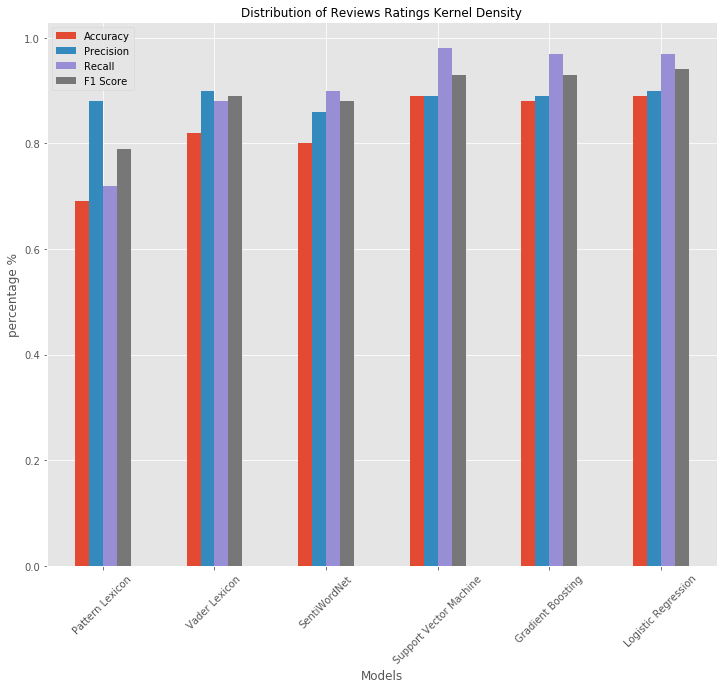

In [147]:
# Plot of performanc metrics

plt.rcParams['figure.figsize']=(12,10)
plt.style.use('ggplot')

df = models_report.drop(columns=['conf_matrix'])
df.set_index("model",drop=True,inplace=True)
# ax = df.plot.bar(rot=0, )
ax = df.plot(kind='bar', rot=45)

plt.xlabel("Models")
plt.ylabel("percentage %")
plt.title("Distribution of Reviews Ratings Kernel Density", fontsize=12)


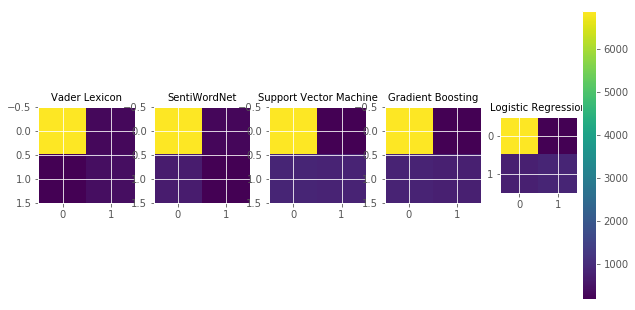

In [150]:
# Plot The confusion Matrix
import numpy as np
import matplotlib.pyplot as plt

w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = 1

for i in range(1, columns*rows +1):
    if i > 5:
        break
    else: 
        img = models_report['conf_matrix'][i]
        fig.add_subplot(rows, columns, i).set_title(models_report['model'][i], fontsize=10)
        plt.imshow(img) # cmap='gray'
#         plt.colorbar()

plt.colorbar()
plt.show()


In [161]:
# remove_stop_words[:10] # hasnt not lemminized 

In [156]:
all_reviews = np.array(dataset['review'])


In [162]:
# normalize the whole reviews data 
norm_all_reviews = normalize_corpus(all_reviews,lemmatize=True,only_text_chars=True)
# norm_all_reviews = norm_train_reviews

In [164]:
# feature extraction - tfidf type
vectorizer, all_features = build_feature_matrix(documents=norm_all_reviews,
                                                  feature_type='frequency',
                                                  ngram_range=(1, 1),
                                                  min_df=0.0, max_df=1.0)



In [184]:
# tokenize the text tokens
sentence_tokens = []
for review in norm_all_reviews: 
    text_tokens = nltk.word_tokenize(review)
    sentence_tokens.append(text_tokens)
# tokenize_text(norm_all_reviews)

In [182]:
import functools
import itertools
import numpy

list_of_words = list(itertools.chain.from_iterable(sentence_tokens))

wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(30)
print(mostcommon)

[(u'the', 103288), (u'be', 92997), (u'i', 70982), (u'and', 58116), (u'it', 56312), (u'to', 53514), (u'a', 49506), (u'of', 33756), (u'this', 31405), (u'have', 30375), (u'not', 26539), (u'my', 25370), (u'in', 22403), (u'for', 21895), (u'that', 20808), (u'on', 18887), (u'with', 17212), (u'you', 16554), (u'do', 16100), (u'but', 16054), (u'love', 13279), (u'as', 12585), (u'great', 12297), (u'one', 11569), (u'like', 11286), (u'so', 11184), (u'good', 10596), (u'album', 10095), (u'kindle', 9909), (u'get', 9561)]


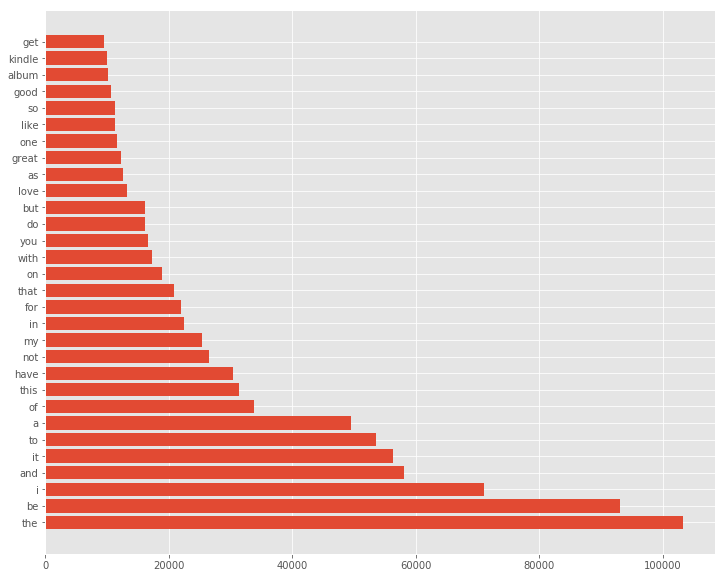

In [183]:
#plot
plt.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
plt.show()



## WordCloud  for top500 of all the reviews

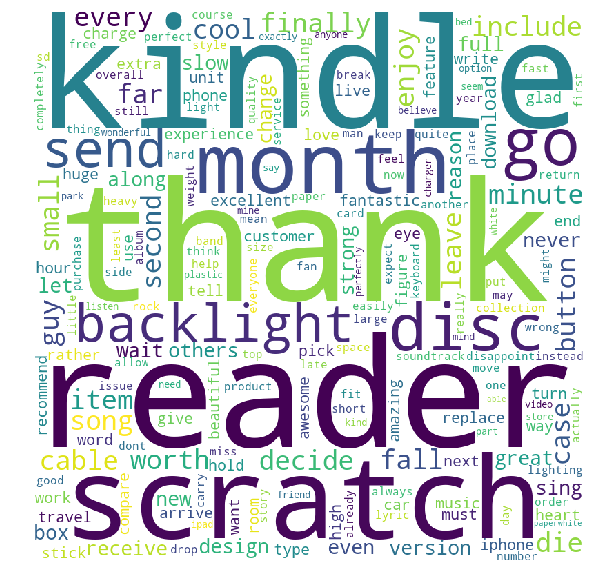

In [195]:
# Python program to generate WordCloud 
from wordcloud import WordCloud, STOPWORDS 

wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon_freq500 = wordfreqdist.most_common(500)
mostcommon_list500 = [val[0] for val in mostcommon_freq500]

# top 500 the words 
comment_words = ' '

for words in mostcommon_list500: 
    comment_words = comment_words + words + ' '


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=STOPWORDS, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [200]:
## for positive and negative reviews

In [196]:
# all_reviews = np.array(dataset['review'])
# read the data back in 
dataset = pd.read_csv("feed_reviews_data.csv")

df_positive = dataset[dataset['sentiment'] == "positive"]
positive_reviews = np.array(df_positive ['review'])

df_negative = dataset[dataset['sentiment'] == "negative"]
negative_reviews = np.array(df_negative ['review'])

In [199]:
# normalize the positive and negative reviews data 
norm_positive_reviews = normalize_corpus(positive_reviews,lemmatize=True,only_text_chars=True)
norm_negative_reviews = normalize_corpus(negative_reviews,lemmatize=True,only_text_chars=True)

# feature extraction - tfidf type
vectorizer, positive_features = build_feature_matrix(documents=norm_positive_reviews,
                                                  feature_type='frequency',
                                                  ngram_range=(1, 1),
                                                  min_df=0.0, max_df=1.0)

vectorizer, negative_features = build_feature_matrix(documents=norm_positive_reviews,
                                                  feature_type='frequency',
                                                  ngram_range=(1, 1),
                                                    min_df=0.0, max_df=1.0)
                 

In [201]:
# tokenize and POS tag text tokens
positive_tokens = []
for review in norm_positive_reviews: 
    text_tokens = nltk.word_tokenize(review)
    positive_tokens .append(text_tokens)

# negative reviews
negative_tokens = []
for review in norm_negative_reviews: 
    text_tokens = nltk.word_tokenize(review)
    negative_tokens.append(text_tokens)



In [202]:
import functools
import itertools
import numpy

# top500 for positive reviews
list_of_positive_words = list(itertools.chain.from_iterable(positive_tokens))
wordfreqdist_positive500 = nltk.FreqDist(list_of_positive_words)
mostcommon_positive500 = wordfreqdist_positive500.most_common(500)

# top500 for negative reviews
list_of_negative_words = list(itertools.chain.from_iterable(negative_tokens))
wordfreqdist_negative500 = nltk.FreqDist(list_of_negative_words)
mostcommon_negative500 = wordfreqdist_negative500.most_common(500)

# print(mostcommon)

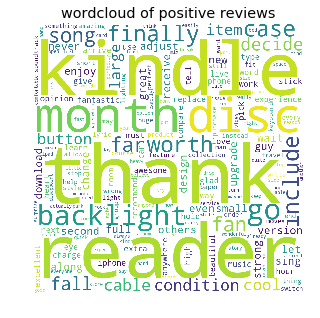

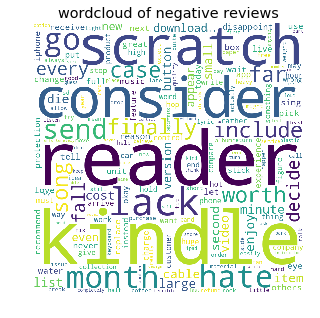

In [220]:
# Python program to generate WordCloud for positive reviews
from wordcloud import WordCloud, STOPWORDS 

### top 500 the words for positive reviews
mostcommon_positive_list500 = [val[0] for val in mostcommon_positive500]

positive_comment_words = ' '

for words in mostcommon_positive_list500 : 
    positive_comment_words = positive_comment_words + words + ' '

# positive comments word cloud
wordcloud_positive = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=STOPWORDS, 
                min_font_size = 10).generate(positive_comment_words) 


### top 500 the words for negative reviews
mostcommon_negative_list500 = [val[0] for val in mostcommon_negative500]

negative_comment_words = ' '

for words in mostcommon_negative_list500: 
    negative_comment_words  = negative_comment_words  + words + ' '

# positive comments word cloud
wordcloud_negative = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=STOPWORDS, 
                min_font_size = 10).generate(negative_comment_words) 


# plot the WordCloud image           
# fig, ax = plt.subplots(2,1) #create subplots that does share the y-axis scale

plt.figure(figsize = (8, 8), facecolor = None) 
plt.subplot(1, 2, 1)
plt.title('wordcloud of positive reviews')
plt.imshow(wordcloud_positive) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.figure(figsize = (8, 8), facecolor = None) 
plt.subplot(1, 2, 2)
plt.title('wordcloud of negative reviews') 
plt.imshow(wordcloud_negative) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.legend()
plt.show() 

In [183]:
cd '/Users/aravind/desktop'

/Users/aravind/Desktop
